Let us first import the necessary libraries required

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Now let us import the datasets required


In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


We will split the dataset now


In [ ]:
a=df.drop("target",axis=1)
b=df.target

Defining the minskowski distance

In [ ]:
def distance(x,y,p):
    dim=len(x)
    dist=0
    for v in range(dim):
        dist=dist+(abs(float(x[v])-float(y[v])))**p
    dist=(dist)**(1/p)
    return dist




In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.25,
                                                   random_state=1)

Defining the KNN functionality

In [ ]:
def knn(dttrain,optrain,dttest,k):
    y_mtest=[]
    for index,rows in dttest.iterrows():
        distanc=np.array([])
        for index,row in dttrain.iterrows():
            distanc=np.append(distanc,distance(row,rows,1))

        tab=optrain.copy()
        tab = tab.to_frame(name="target")
        tab["distance"]=distanc
        y=["distance","target"]

        tab=tab.reindex(columns=y)
        tab=tab.sort_values(by="distance")
        tab=tab.head(k)
        targo=tab["target"].mode()[0]
        y_mtest.append(targo)

    return y_mtest





Printing the result and the accuracy obtained

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, knn(X_train,y_train,X_test,5)))
print(knn(X_train,y_train,X_test,5))


0.9736842105263158
[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0]


Now let us compare this with the inbuilt function to implement KNN.

In [ ]:

# Testing to see results from sklearn.neighbors.KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, p=1)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

print(f"Sklearn KNN Accuracy: {accuracy_score(y_test, y_pred_test)}")

Sklearn KNN Accuracy: 0.9736842105263158


Now let us try to figure out the optimal value of k by drawing a error vs k value graph.

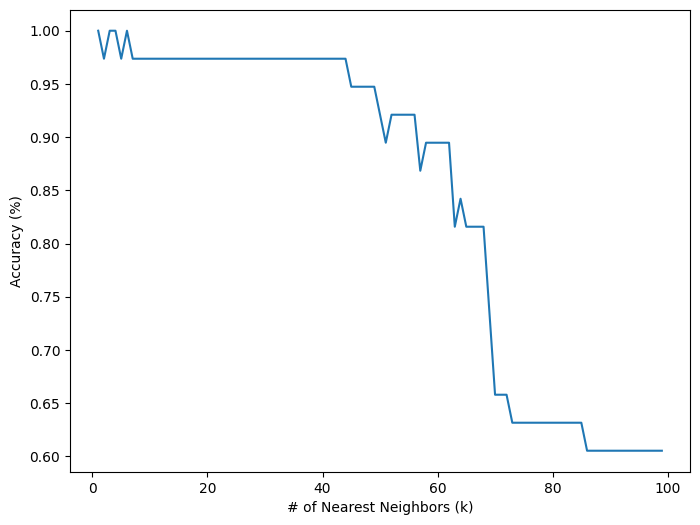

In [ ]:
# Obtain accuracy score varying k from 1 to 99

accuracies = []

for k in range(1,100):
    y_hat_test = knn(X_train,y_train, X_test,k)
    accuracies.append(accuracy_score(y_test, y_hat_test))

# Plot the results

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');

Now let us implement the naive bayes classifier in the same dataset.


In [ ]:
from sklearn.naive_bayes import GaussianNB
mdl=GaussianNB()
mdl.fit(X_train,y_train)
y_pred=mdl.predict(X_test)
print(f"Accuracy of our model is : {accuracy_score(y_test,y_pred)*100}")

Accuracy of our model is : 97.36842105263158
